### PART 1 - Exploratory Data

The original dataset can be found at: https://www.kaggle.com/wenruliu/adult-income-dataset

## Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
adult = pd.read_csv('adult_original.csv')
adult.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Project Description
(Comments are made with markdown, also ''''' and #)

Brief explanation about the project

For this project, we will be working on yearly income to:
"Determine if an individual makes over 50K a year"

The data set was downloaded from Kaggle with
48842 instances (rows) and 15 attributes (columns), we hope to use these 
indicators to determine how much a person is or will be earning.

The final target that we want to achieve is to be able to determine if a person is earning 
more than $50,000/year based on certain features

This project will be divided into 3 parts:

1) First Part of the project will be just checking and getting to know the data.

2) Second Part is cleaning data.

3) Third Part is the data analysis.


Description about attributes in the data set taken from the UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/Adult

Attribute Information:

>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous. Tells the number of people that the census believes that the entry represents with these features.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, 
Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,
Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India,
Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, 
Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Basic Exploration

In [3]:
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Check the shape of the dataset (rows, columns)
adult.shape

(48842, 15)

In [5]:
# statistical analysis of numerical variables
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


This shows that the numerical variable do not have any NULL values (not necessarily no missing values) because the count is 48842 for all variables.
The mean and quartiles of each of the variables show that they are on different scales indicating
the need to normalize or scale the variables to bring them on the same scale


In [6]:
# Let us now look at the statistical summary of all variables, including categorical variables:
adult.describe(include = 'all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


This result shows the most common values for the categorical variables with their frequency, and the uniques values for each of the categorical variables.
It also appears that there are no NULL values for any of the cateegorical variables.
The 'native-country' variable has the most unique values with 42 values and 'gender' has the least with 2 (only accounting for male and female).
It appears that most of the observations in this data were high school graduates who are married to civilians (as compared to members of the armed forces).
The most common value of occupation is 'Prof_spec' and the most common race of the pbservation is 'White,' which is not surprising since the data was gathered in the U.S.

In [7]:
# Display the column names of the dataset
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

The names of the variables are of string datatype and there are no spaces in the names (only hyphens)


In [8]:
# Check the data types within each column
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


There are only two datatypes in the dataset: string and integer. This is not surprising since there are only numerical (integer) and categorical variables
in the dataset

## Missing Values

In [9]:
# The next function is to check whether or not there are missing values in the dataset,
# Using .sum() to count the total of the missing values in the dataset
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

After running the dataset, it seems that 
there are no missing values

However, it should be double checked because the missing values might be represented with another notation, such as "?" or possibly "n/a"

In [10]:
# Look for '?' in each column to see if there are any missing values
adult.loc[adult['age'].isin(['?'])]
# There are no missing values for age

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [11]:
adult.loc[adult['workclass'].isin(['?'])]
# workclass has 2799 missing values. These appear to be the same ones as the missing values of occupation

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [12]:
adult.loc[adult['fnlwgt'].isin(['?'])]
# There are no missing values for fnlwgt

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [13]:
adult.loc[adult['education'].isin(['?'])]
# There are no missing values for education

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [14]:
adult.loc[adult['educational-num'].isin(['?'])]
# There are no missing values for educational number

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [15]:
adult.loc[adult['marital-status'].isin(['?'])]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [16]:
# Look for '?' in each column to see if there are any missing values
adult.loc[adult['occupation'].isin(['?'])]
# occupation has 2809 missing values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [17]:
adult.loc[adult['relationship'].isin(['?'])]
# Relationship has no missing values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [18]:
adult.loc[adult['race'].isin(['?'])]
# Race has no missing values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [19]:
adult.loc[adult['gender'].isin(['?'])]
# Gender has no missing values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [20]:
adult.loc[adult['capital-gain'].isin(['?'])]
# Capital gain has no missing values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [21]:
adult.loc[adult['capital-loss'].isin(['?'])]
# Capital loss has no missing values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [22]:
adult.loc[adult['hours-per-week'].isin(['?'])]
# Hours per week has no missing values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [23]:
adult.loc[adult['native-country'].isin(['?'])]
# Native country has 857 missing values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
188,34,State-gov,513100,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,?,<=50K
253,42,Federal-gov,177937,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
48773,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
48791,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [24]:
adult.loc[adult['income'].isin(['?'])]
# Income has no missing values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


It appears that three columns: workclass, occupation, and native-country have missing values.
Looking these rows, it can be seen that many of the rows have occupation and workclass missing together, as well as some values of native-country.

Let us explore how many rows have two (or all three) values for the variables missing.


In [25]:
adult.loc[adult['workclass'] == adult['occupation']]
# There are 2799 where workclass AND occupation are missing
# This means that for all missing values of workclass, occupation is also missing

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [26]:
adult.loc[adult['workclass'] == adult['native-country']]
# There are 46 rows where workclass and native country are missing

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2160,28,?,243190,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Male,0,0,30,?,<=50K
2323,50,?,339547,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,50,?,<=50K
2584,47,?,163748,Masters,14,Divorced,?,Unmarried,White,Female,0,0,35,?,<=50K
2612,27,?,258231,HS-grad,9,Never-married,?,Not-in-family,White,Male,0,0,35,?,<=50K
2774,27,?,132372,HS-grad,9,Never-married,?,Unmarried,White,Female,0,0,40,?,<=50K
3074,23,?,264874,Assoc-voc,11,Never-married,?,Other-relative,White,Female,0,0,40,?,<=50K
3671,24,?,35633,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,11,?,<=50K
3853,28,?,195568,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,15,?,>50K
5052,21,?,156780,Some-college,10,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,15,?,<=50K
5972,40,?,95049,Assoc-voc,11,Separated,?,Own-child,White,Female,0,0,40,?,<=50K


In [27]:
adult.loc[adult['occupation'] == adult['native-country']]
# There are 46 rows where occupation and native country are missing

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2160,28,?,243190,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Male,0,0,30,?,<=50K
2323,50,?,339547,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,50,?,<=50K
2584,47,?,163748,Masters,14,Divorced,?,Unmarried,White,Female,0,0,35,?,<=50K
2612,27,?,258231,HS-grad,9,Never-married,?,Not-in-family,White,Male,0,0,35,?,<=50K
2774,27,?,132372,HS-grad,9,Never-married,?,Unmarried,White,Female,0,0,40,?,<=50K
3074,23,?,264874,Assoc-voc,11,Never-married,?,Other-relative,White,Female,0,0,40,?,<=50K
3671,24,?,35633,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,11,?,<=50K
3853,28,?,195568,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,15,?,>50K
5052,21,?,156780,Some-college,10,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,15,?,<=50K
5972,40,?,95049,Assoc-voc,11,Separated,?,Own-child,White,Female,0,0,40,?,<=50K


It appears that there are 46 rows where occupation AND workclass AND native country are missing.

All of workclass's missing values also has occupation missing which makes sense because it is hard to determine working class if occupation records have not been collected.

Hence, to deal with these missing values, we can:
- Remove all rows where workclass AND occupation AND native-country are missing. This is because there are too many missing values in these rows.
- Remove all rows where workclass AND occupation are missing since it is a small proportion of the data: 2799/48812 = 5.7% of the total number of rows

Let now look at the distribution of each variable to determine how to deal with the remaining missing values (missing values of native country and occupation).


## Distributions of Features

### Age

In [28]:
# Maximum and minimum values of age
print(max(adult['age']))
print(min(adult['age']))
# Looking at these values, we can create bins of 5 years:
# 15-20, 20-25, 25-30, etc.

90
17


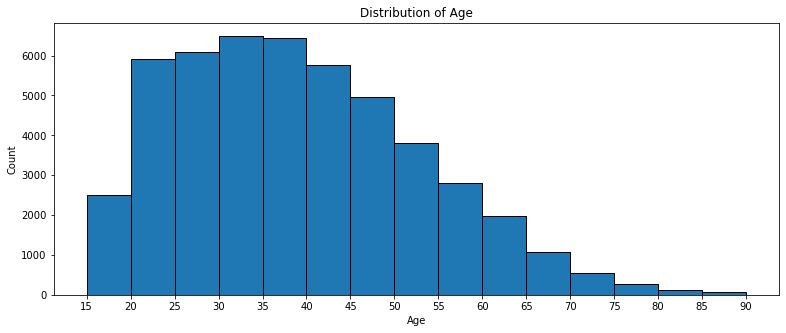

In [29]:
plt.figure(figsize = (13, 5))
plt.hist(adult['age'], bins = range(15, 95, 5),ec = 'black')
plt.xticks(range(15, 95, 5))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

#### Histogram 'Distribution of age'

The histogram above shows asymmetrical right-skeweness.

The distribution's peak is not at the center, leans more to the right which shows that there are more lower values in comparison to the higher values.

The age range for this data is from 17 to 90. From histogram above it seems that most people are in the age range of 20-45, and the number gets lower as it moves from 45 to 90, which does make sense because there are age for retirement
but also the depends on what kind of job is the person working.


### Workclass

In [30]:
# Look at unique values of the categorical variable workclass
adult['workclass'].value_counts()
# It appears that most people in this census dataset are in a private working class with the smallest amount never having worked

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

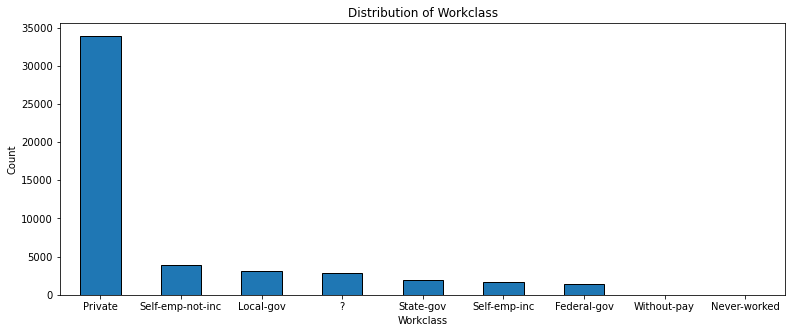

In [31]:
plt.figure(figsize = (13, 5))
adult['workclass'].value_counts().plot(kind = 'bar', ec = 'black')
plt.xticks(rotation = 0)
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Distribution of Workclass')
plt.show()

#### Histogram 'Distribution of WorkClass'

It seems that the data collected the majority of people work in private sectors; there is a huge difference between the private sector and other work classes.

The number of workers in Self-employment, Loca-gov, State-gov and Federal-gov does not have much difference; they seem to be in the same range

The missing values are also reflected in the histogram with the label '?' 

### fnlwgt

In [32]:
# Understanding the range of the variable
print(max(adult['fnlwgt']))
print(min(adult['fnlwgt']))
# It is clear that there is a large range in this variable. This variable may need to be normalized (bring values between 0 and 1)

1490400
12285


In [33]:
count, bin_edges = np.histogram(adult['fnlwgt'])
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[19939 22790  5225   673   151    35    15     7     3     4]
[  12285.   160096.5  307908.   455719.5  603531.   751342.5  899154.
 1046965.5 1194777.  1342588.5 1490400. ]


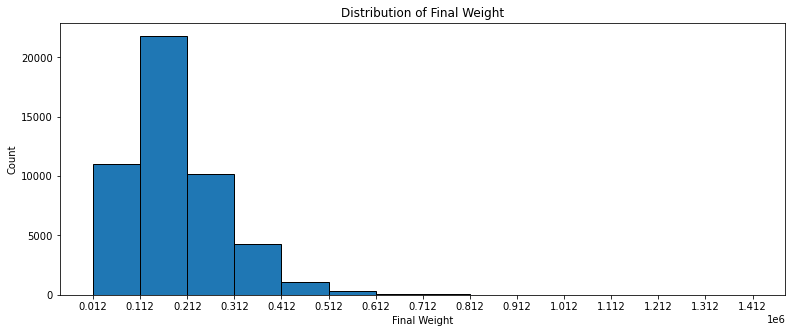

In [34]:
plt.figure(figsize = (13, 5))
plt.hist(adult['fnlwgt'], bins = range(12285, 1490405, 100000), ec = 'black')
plt.xticks(range(12285, 1490405, 100000), rotation = 0)
plt.xlabel('Final Weight')
plt.ylabel('Count')
plt.title('Distribution of Final Weight')
plt.show()

#### Histogram of 'Distribution of Final Weight'

For final weight the histogram is right-skewed or asymmetrical.

Final weight is just  the number of people that the census believes that  the entry represents (this attribute might be dropped for data analysis as it is not useful for the analysis).

### Education

In [35]:
# Look at unique values of the categorical variable workclass

'''
It appears that most people in this census dataset graduated from high school with the smallest 
name having just gone to preschool
'''

adult['education'].value_counts()


HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

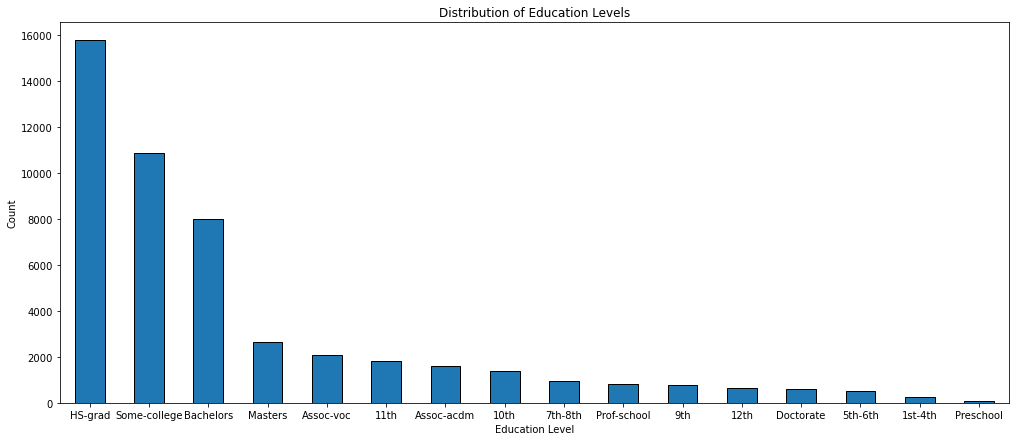

In [36]:
plt.figure(figsize = (17, 7))
adult['education'].value_counts().plot(kind = 'bar', ec = 'black')
plt.xticks(rotation = 0)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()

#### Bar chart of 'Education Level'

The histogram above shows the distribution of different level of education among individuals.
It also appears to be a right-skewed; the majority of the workers are high-school graduates, followed by Some-college degree and Bachelor and other level of education.

Small portion have a Masters and Doctorate degree and the smallest distribution of people who only achieved a pre-school education.

We will not be exploring the 'educational-num' varibale since it is related to the 'education' variable 
(numbers corresponding to the various educational levels).


### Marital-status

In [37]:
# Look at unique values of the categorical variable workclass
adult['marital-status'].value_counts()
# It appears that most people in this census dataset are married to a civilian with the smallest number being married to someone from the Armed Forces.

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

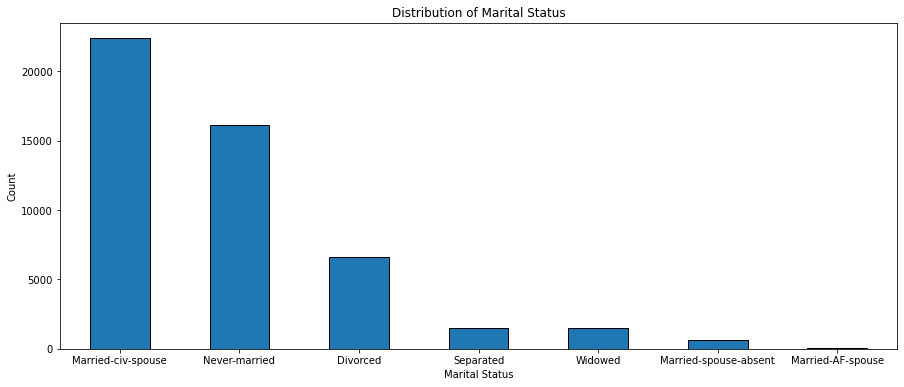

In [38]:
plt.figure(figsize = (15, 6))
adult['marital-status'].value_counts().plot(kind = 'bar', ec = 'black')
plt.xticks(rotation = 0)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.show()

#### Bar chart of 'Distribution of Marital Status'

The above histogram shows a distribution of marital status of the workers.

It is also right-skewed with the majority being married, followed by being never being married. Divorced statuses has a small portion. Separated, Widowed and-Married-spouse abosent have almost the same portion.

While the smallest portion are the workers whose spouse are in the Armed Force. 


### Occupation

In [39]:
# Look at unique values of the categorical variable workclass
adult['occupation'].value_counts()
# It appears that most people in this census dataset havee a professional speciality
# with the smallest number being in the Armed Forces.  This is consistent with the marital-status data as well.
# However, these values are closer to each other, such as Prof-speciality (6172) and Craft-repair (6112).

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

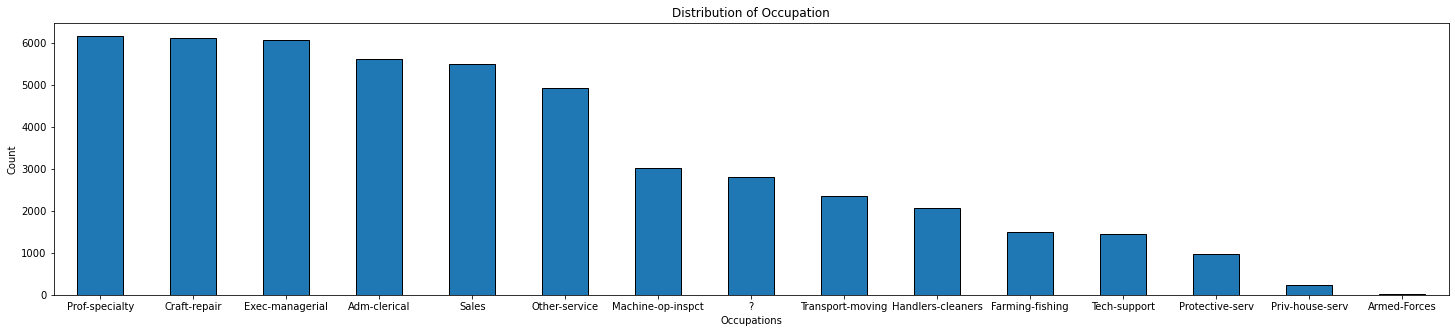

In [40]:
plt.figure(figsize = (25, 5))
adult['occupation'].value_counts().plot(kind = 'bar', ec = 'black')
plt.xticks(rotation = 0)
plt.xlabel('Occupations')
plt.ylabel('Count')
plt.title('Distribution of Occupation')
plt.show()

#### Bar chart of 'Distribution of Occupation'

This is also right-skewed, but also seeems have uniform distribution.

The occupatio for Prof-speciality, Craft-repair and Exec-Managerial seems to have a uniform distribution if we chose to ignore other positions. 
Similarly Adm-lercal and Sales have a similar proportion. 

While the rest are right-skewed, Armed-Forced has the smalles portion for the distribution of occupation

The missing values are also represented in the dataset with interrogation sign '?'


### Relationship

In [41]:
# Look at unique values of the categorical variable workclass
adult['relationship'].value_counts()
# It appears that most people in this census dataset are husbands with the smallest number being 'Other Relatives'.
# This appears to be a patriarchal dataset.

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

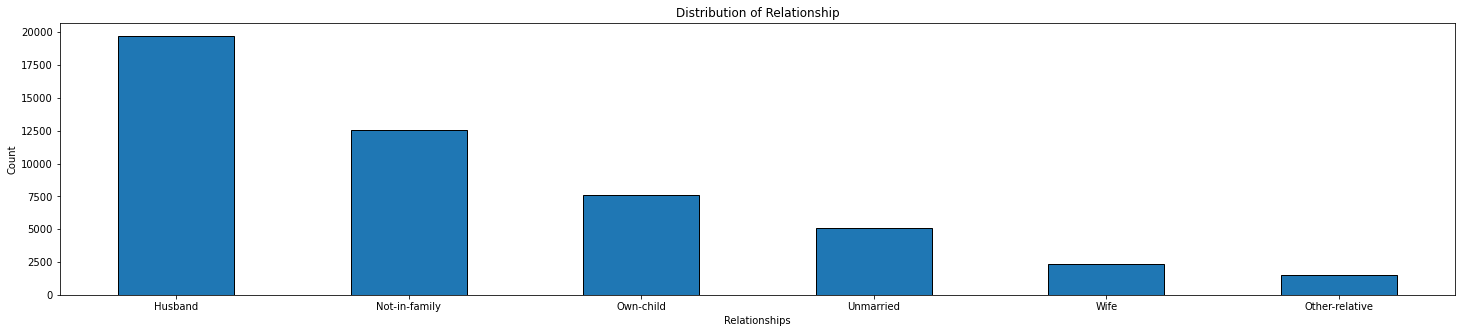

In [42]:
plt.figure(figsize = (25, 5))
adult['relationship'].value_counts().plot(kind = 'bar', ec = 'black')
plt.xticks(rotation = 0)
plt.xlabel('Relationships')
plt.ylabel('Count')
plt.title('Distribution of Relationship')
plt.show()

#### Bar chart of 'Distribution of Relationship'

It is right-skewed. Based on the histogram above it appears that this dataset is a 'patriarchal dataset'  with Husband represented as the largest portion in comparison to wife. It seems that there is a huge gap between husband and wife
(wife is also the smallest other than 'Other-relative')

We might remove this variable because it indicates similar information as the 'marital-status' variable since the most common answer is Husband.

### Gender

In [43]:
# Look at unique values of the categorical variable workclass
adult['gender'].value_counts()
# It appears that most people in this census dataset are males.
# This appears to be a patriarchal dataset.

Male      32650
Female    16192
Name: gender, dtype: int64

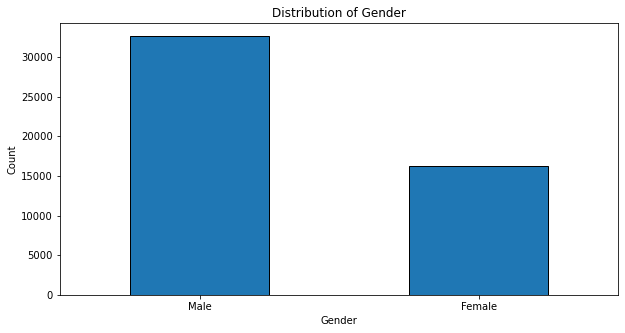

In [44]:
plt.figure(figsize = (10, 5))
adult['gender'].value_counts().plot(kind = 'bar', ec = 'black')
plt.xticks(rotation = 0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

#### Bar chart of 'Distribution of Gender'

For this specific dataset gender in this case is the biological sex of the individual.

As it shown above that majority of the worker are male and it seems that the number of males is twice the number of females (thus, it supports the patriarchal dataset shown in histogram of 'Distribution of Relationship').


### Race

In [45]:
# Look at unique values of the categorical variable workclass
adult['race'].value_counts()
# It appears that most people in this census dataset are white with the smallest number being 'Other' or 'Amer-Indian-Eskimo.'

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

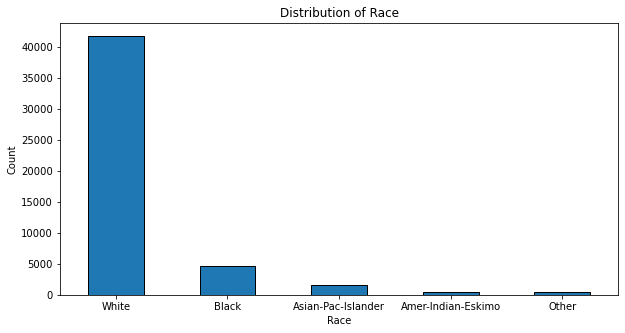

In [46]:
plt.figure(figsize = (10, 5))
adult['race'].value_counts().plot(kind = 'bar', ec = 'black')
plt.xticks(rotation = 0)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race')
plt.show()

#### Bar chart of 'Distribution of Race'

It appears that majority of the individuals represented in the dataset are 'white.'

While the rest of the race have a small portion.

The representation is acceptable, seeing that the census dataset is collected in the United States.


### Capital Gain

In [47]:
# Maximum and minimum values of capital gain
print(max(adult['capital-gain']))
print(min(adult['capital-gain']))
# Looking at these values, we can create bins of for every 5,000 dollars:

print((adult['capital-gain'] > 15000).value_counts())
# We can see that the values of capital-gain are unevenly distributed with most of the values being below $15,000

99999
0
False    47928
True       914
Name: capital-gain, dtype: int64


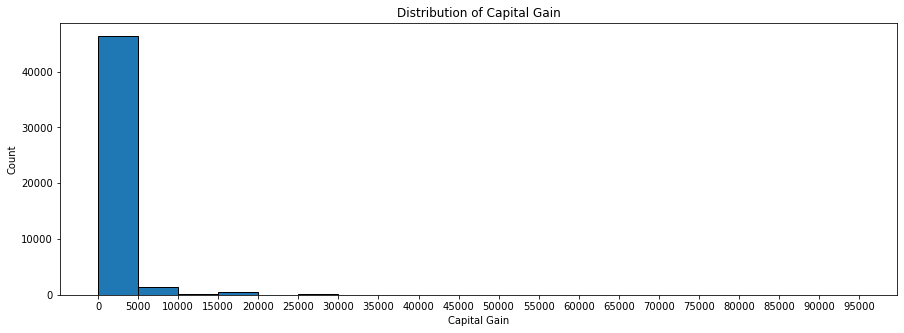

In [48]:
plt.figure(figsize = (15, 5))
plt.hist(adult['capital-gain'], bins = range(0, 100000, 5000),ec = 'black')
plt.xticks(range(0, 100000, 5000))
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.title('Distribution of Capital Gain')
plt.show()

#### Histogram of 'Distributio of Capital Gain'

This is a right-skewed histogram.

The capital gain refers to profit earned from sales of assets or from an investment for an individual. 
The dataset illustrated above shows majority of the capital gain in the range of 0 to 5000, while values of 5000 and above has a very small portion.


### Capital Loss

In [49]:
# Maximum and minimum values of capital loss
print(max(adult['capital-loss']))
print(min(adult['capital-loss']))
# Looking at these values, we can create bins of for every 1,000 dollars:

print((adult['capital-loss'] > 1000).value_counts())
# We can see that the values of capital-loss are unevenly distributed with most of the values being below $1,000

4356
0
False    46605
True      2237
Name: capital-loss, dtype: int64


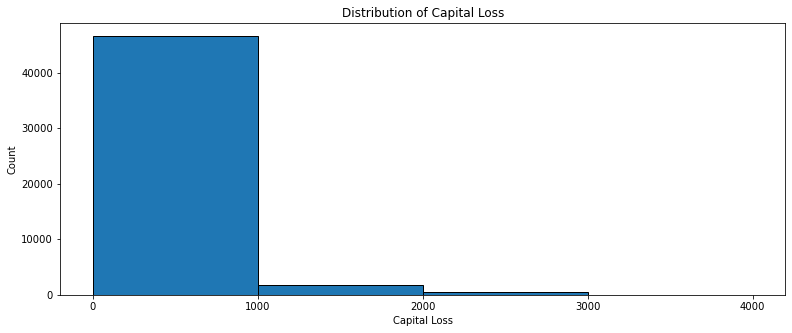

In [50]:
plt.figure(figsize = (13, 5))
plt.hist(adult['capital-loss'], bins = range(0, 5000, 1000),ec = 'black')
plt.xticks(range(0, 5000, 1000))
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.title('Distribution of Capital Loss')
plt.show()

#### Histogram of 'Distribution of Capital Loss'

This is also a right-skewed. Capital Loss refers to the loss that happens when the capital assets such as investment decreases in value. 
The loss is only seen when the value of the asset is sold at a lower price, this is a financial loss for the individual

As illustrated in the histogram above, majority of the capital los is between 0 and 1000, while the smaller portion are 1000 and above.


### Hours per Week

In [51]:
# Maximum and minimum values of hours per week worked
print(max(adult['hours-per-week']))
print(min(adult['hours-per-week']))
# Looking at these values, we can create bins of for every 10 hours:

99
1


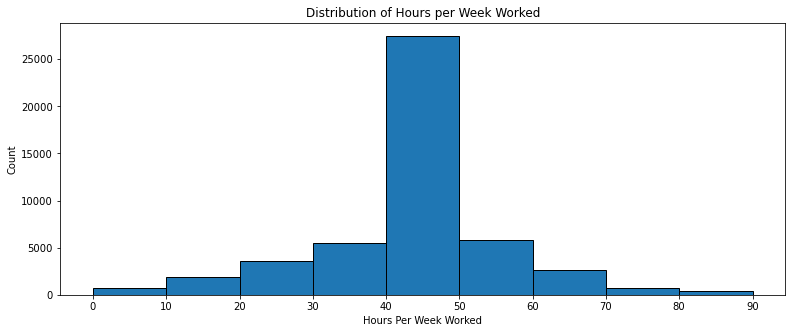

In [52]:
plt.figure(figsize = (13, 5))
plt.hist(adult['hours-per-week'], bins = range(0, 100, 10),ec = 'black')
plt.xticks(range(0, 100, 10))
plt.xlabel('Hours Per Week Worked')
plt.ylabel('Count')
plt.title('Distribution of Hours per Week Worked')
plt.show()

#### Histogram of 'Distribution of Hours per Week Worked'


The working hours are in the range of 1 to 99 hours.

The histogram illustrated above, shows a normal distribution, the histogram has a bell-shaped curve or is symmetric. This shows that the majority of the worker worked betweeen 40 to 50 hours per week


### Native Country

In [53]:
# Look at unique values of the categorical variable native country
adult['native-country'].value_counts()
# It appears that most people in this census dataset are from the United States with the smallest number being from Holand-Netherlands (1 person).

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

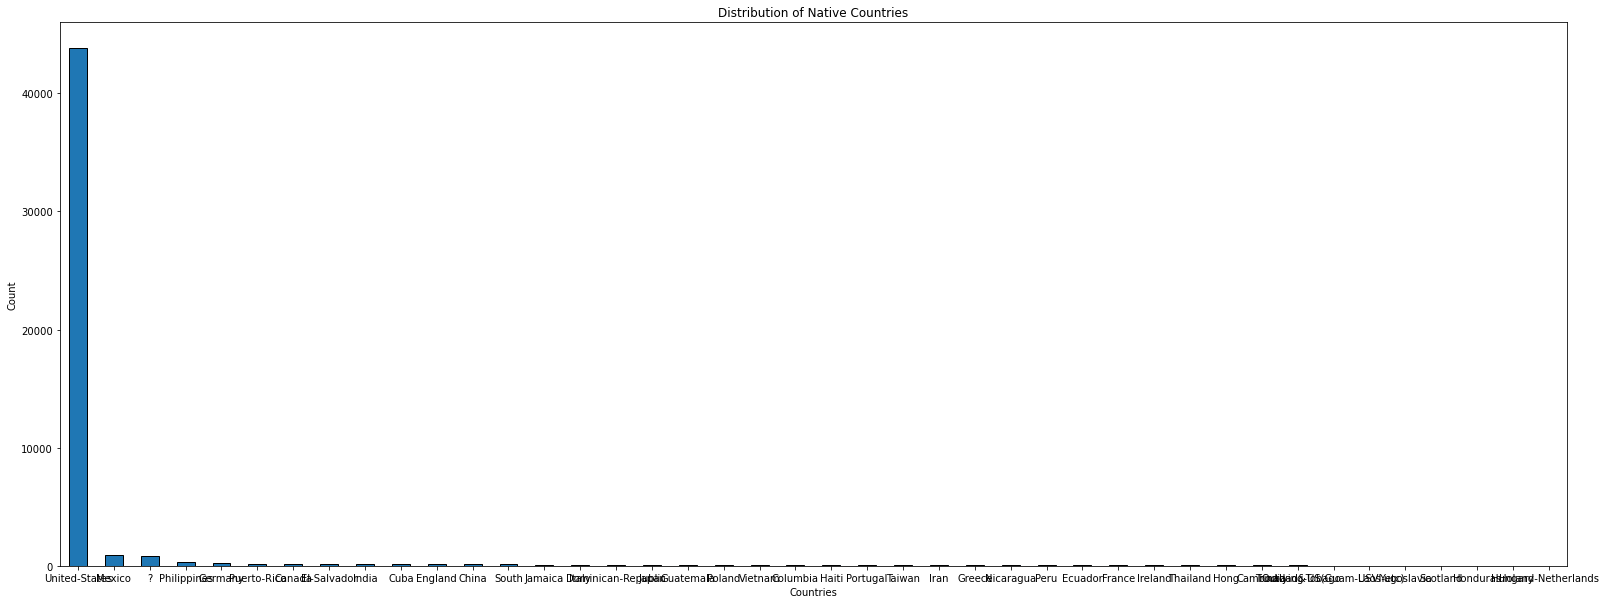

In [54]:
plt.figure(figsize = (27, 10))
adult['native-country'].value_counts().plot(kind = 'bar', ec = 'black')
plt.xticks(rotation = 0)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Distribution of Native Countries')
plt.show()

#### Bar chart of 'Distribution of Native Countries'

The histogram shows that majority of the individuals are from the United States, while other Native Country values contribute to a very small portion of the dataset which makes sense, since the data is collected from the United States Census.


### Income

In [55]:
# Look at unique values of the categorical binary variable income.
adult['income'].value_counts()
# It appears that most people in this census dataset have an income less than or equal to $50,000.

<=50K    37155
>50K     11687
Name: income, dtype: int64

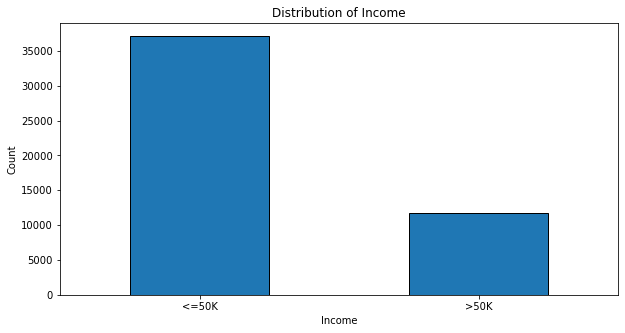

In [56]:
plt.figure(figsize = (10, 5))
adult['income'].value_counts().plot(kind = 'bar', ec = 'black')
plt.xticks(rotation = 0)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.show()

#### Bar chart of 'Distribution of Income'

The histogram above illustrated that majority of the worker earn less than or equal to 50k yearly, which is more than double of those who earn greater than 50k yearly

Income is also the response variable or target attribute.
Using other predictors, we will see what are the factors that contributes to an 
individual earninig more or less than 50k yearly.

We will not up-scale or down-scale the dataset because we believe that it is a representation of the true population, where most people earn less than $50,000 yearly. Hence, we will leave the dataset as is to show the proportion of the different categories of income.

### Duplicated Values

This dataset records features of people in the United States to determine the income.
Duplicate values in this dataset will not be surprising because there can be people who have all the same features but still be considered important.
Therefore, this analysis, while important to know to make sure that people with the same features have the same income type, will not largely impact
data cleaning methods.


In [57]:
adult.duplicated().value_counts()
# There are 52 observations that have ALL the same rows

False    48790
True        52
dtype: int64

In [58]:
# Let us now look to see how many rows have the same features except the predictor variable:
adult.duplicated(subset = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']).value_counts()
# There are 57 rows that have all the same features.
# However, from the previous analysis, we can see that five rows that have the same features were not classified the same as the rest. 

False    48785
True        57
dtype: int64

## Correlation

In [59]:
adult.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


As it can be seen, all variables have a relatively weak correlation (less than 1 or -1).

Let us look at a scatterplot between a few variables:

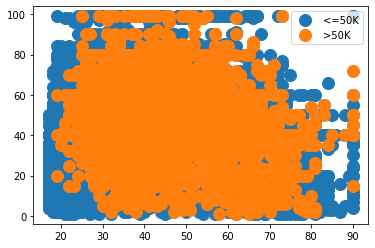

In [60]:
groups = adult.groupby('income')
for name, group in groups:
    plt.plot(group.age, group['hours-per-week'], marker='o', linestyle='', markersize=12, label=name)

plt.legend()

This scatterplot shows that there is not a strong correlation between the age and hours per week worked. This can be observed because there is no pattern in the points with the points being scattered all over the plot.
The correlation is 0.07 which is very close to zero, indicating a low or weak correlation. Further, it can be seen that there is not a strong predictor of income in these variables.

Text(0.5, 1.0, 'Education and Capital Gain by Income')

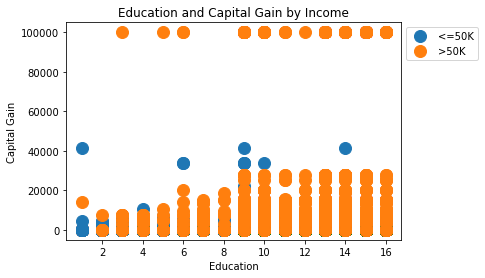

In [61]:
for name, group in groups:
    plt.plot(group['educational-num'], group['capital-gain'], marker='o', linestyle='', markersize=12, label=name)

plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.xlabel('Education')
plt.ylabel('Capital Gain')
plt.title('Education and Capital Gain by Income')

This scatterplot shows that there is not a strong correlation between the education and capital gains. This can be observed because there is no pattern in the points with the points being scattered all over the plot.
The correlation is 0.13 which is very close to zero, indicating a low or weak correlation.
Further, it can be seen that there is not a strong predictor of income in these variables.

Text(0.5, 1.0, 'Education and Capital Loss by Income')

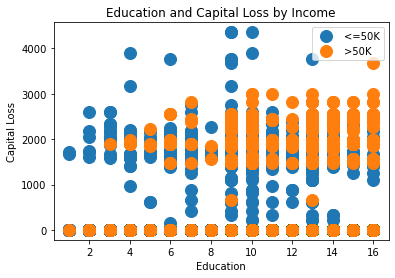

In [62]:
for name, group in groups:
    plt.plot(group['educational-num'], group['capital-loss'], marker='o', linestyle='', markersize=12, label=name)

plt.legend()
plt.xlabel('Education')
plt.ylabel('Capital Loss')
plt.title('Education and Capital Loss by Income')

This scatterplot shows that there is not a strong correlation between the education and capital loss. This can be observed because there is no pattern in the points with the points being scattered all over the plot.
The correlation is 0.08 which is very close to zero, indicating a low or weak correlation.
Further, it can be seen that there is not a strong predictor of income in these variables since income can be eitheer >50K or <=50K of people in all ages nad most capital loss values.

Similarly all the other variables have low correlations with each other, indicating that there is low multicollinearity in this dataset.

### Next is Part 2 - Data Cleaning
(Notebook Part 2)